In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import HTML, display
from PIL import Image


=== Trening Q-learning dla gamma = 0.9 ===
Ep 200: Średnia nagroda = -200.00
Ep 400: Średnia nagroda = -178.80
Ep 600: Średnia nagroda = -200.00
Ep 800: Średnia nagroda = -115.30
Ep 1000: Średnia nagroda = -115.80
Ep 1200: Średnia nagroda = -136.90
Ep 1400: Średnia nagroda = -74.50
Ep 1600: Średnia nagroda = -74.60
Ep 1800: Średnia nagroda = 8.00
Ep 2000: Średnia nagroda = -13.10
Ep 2200: Średnia nagroda = -53.70
Ep 2400: Średnia nagroda = -12.90
Ep 2600: Średnia nagroda = -12.80
Ep 2800: Średnia nagroda = 7.20
Ep 3000: Średnia nagroda = -33.60
Ep 3200: Średnia nagroda = 8.60
Ep 3400: Średnia nagroda = -12.20
Ep 3600: Średnia nagroda = 9.30
Ep 3800: Średnia nagroda = 7.30
Ep 4000: Średnia nagroda = 7.50
Ep 4200: Średnia nagroda = 7.30
Ep 4400: Średnia nagroda = 8.00
Ep 4600: Średnia nagroda = 7.70
Ep 4800: Średnia nagroda = 9.10
Ep 5000: Średnia nagroda = 7.10


/var/folders/1m/0h0qj6kd7gb_qzlllmbbrcw40000gn/T/ipykernel_14852/3928281228.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/1m/0h0qj6kd7gb_qzlllmbbrcw40000gn/T/ipykernel_14852/3928281228.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("taxi_qlearning_curve.png")


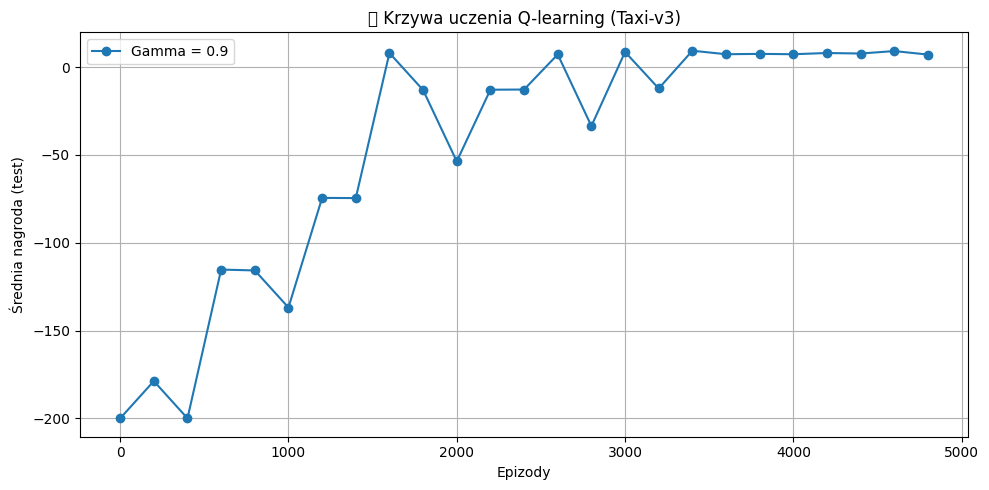

In [13]:
# ==== 1. Środowisko i pojedynczy współczynnik gamma ====
env_id = "Taxi-v3"
gamma = 0.9
print(f"\n=== Trening Q-learning dla gamma = {gamma} ===")

env = gym.make(env_id)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

alpha = 0.1
epsilon = 0.1
episodes = 5000  
test_interval = 200
max_steps = 200  
eval_rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    step = 0

    while not done and step < max_steps:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, _, _ = env.step(action)
        best_next_action = np.max(q_table[next_state])
        td_target = reward + gamma * best_next_action
        td_error = td_target - q_table[state, action]
        q_table[state, action] += alpha * td_error

        state = next_state
        step += 1

    # Ewaluacja co test_interval epizodów
    if (episode + 1) % test_interval == 0:
        total_rewards = []
        for _ in range(10):  # Mniej testów dla przyspieszenia
            state, _ = env.reset()
            done = False
            ep_reward = 0
            step = 0
            while not done and step < max_steps:
                action = np.argmax(q_table[state])
                state, reward, done, _, _ = env.step(action)
                ep_reward += reward
                step += 1
            total_rewards.append(ep_reward)
        avg_eval_reward = np.mean(total_rewards)
        eval_rewards.append(avg_eval_reward)
        print(f"Ep {episode + 1}: Średnia nagroda = {avg_eval_reward:.2f}")

np.save("q_table_gamma_0.9.npy", q_table)

# ==== 2. Wykres uczenia ====
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(eval_rewards)) * test_interval, eval_rewards, marker='o', label="Gamma = 0.9")
plt.xlabel("Epizody")
plt.ylabel("Średnia nagroda (test)")
plt.title("📊 Krzywa uczenia Q-learning (Taxi-v3)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("taxi_qlearning_curve.png")
plt.show()

# ==== 3. Pokaz działania agenta (gamma = 0.9) ====
q_table = np.load("q_table_gamma_0.9.npy")
env = gym.make(env_id, render_mode="rgb_array")
state, _ = env.reset()
frames = []

step = 0
done = False
while not done and step < max_steps:
    frame = env.render()
    frames.append(Image.fromarray(frame))
    action = np.argmax(q_table[state])
    state, reward, done, _, _ = env.step(action)
    step += 1

env.close()

gif_path = "taxi_agent_gamma_0.9.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], loop=0, duration=300)
display(HTML(f"<h4>🚕 Agent Q-learning z gamma=0.9 w Taxi-v3</h4><img src='{gif_path}' width='400'/>"))
